In [56]:
import sys

try:
  import google.colab
  from google.colab import drive

  google_drive = '/content/drive'
  drive.mount(google_drive)

  root_dir = google_drive + "/MyDrive/OML"
  sys.path.append(root_dir)
except:
  root_dir = ""

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Show-the-format-of-the-result" data-toc-modified-id="Show-the-format-of-the-result-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Show the format of the result</a></span></li><li><span><a href="#Learning-curve-with-different-number-of-cores-(learning_cores-2^8)" data-toc-modified-id="Learning-curve-with-different-number-of-cores-(learning_cores-2^8)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Learning curve with different number of cores (learning_cores 2^8)</a></span></li><li><span><a href="#Comparison-of-computational-time-(learning_cores-2^8)" data-toc-modified-id="Comparison-of-computational-time-(learning_cores-2^8)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of computational time (learning_cores 2^8)</a></span></li><li><span><a href="#Learning-curve-(two_cores,-different-quantization-level)" data-toc-modified-id="Learning-curve-(two_cores,-different-quantization-level)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Learning curve (two_cores, different quantization level)</a></span></li><li><span><a href="#Compare-with-other-compression-scheme" data-toc-modified-id="Compare-with-other-compression-scheme-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare with other compression scheme</a></span><ul class="toc-item"><li><span><a href="#Quantization-level,-random-k-and-top-k,-all-schemes-keep-2^8-non-trivial-values(non-zeros)" data-toc-modified-id="Quantization-level,-random-k-and-top-k,-all-schemes-keep-2^8-non-trivial-values(non-zeros)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Quantization level, random k and top k, all schemes keep 2^8 non-trivial values(non zeros)</a></span></li></ul></li><li><span><a href="#Computational-time-of-random-k-=-2^8-with-4-coures" data-toc-modified-id="Computational-time-of-random-k-=-2^8-with-4-coures-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Computational time of random k = 2^8 with 4 coures</a></span></li><li><span><a href="#Number-of-bytes-after-compression" data-toc-modified-id="Number-of-bytes-after-compression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Number of bytes after compression</a></span></li></ul></div>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import importlib

In [58]:
import utils
importlib.reload(utils)
from utils import get_result_dir, get_figures_dir, load_results, load_pickles, load_dataset, plot, plot_df
from take_k import get_bytes_per_iterations_take_k
from sgd import get_bytes_per_iterations_sgd
from signed_sgd import get_bytes_per_iterations_sign_sgd

In [59]:
results_dir = get_result_dir(root_dir)
figures_dir = get_figures_dir(root_dir)

# Show the format of the result

In [60]:
losses, iters, timers = load_results(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores1-1/')

print("losses :", type(losses), losses.shape)
print("iters :", type(iters), iters.shape)
print("timers :", type(timers), timers.shape)

losses : <class 'numpy.ndarray'> (20,)
iters : <class 'numpy.ndarray'> (20,)
timers : <class 'numpy.ndarray'> (20,)


# Learning curve with different number of cores (learning_cores 2^8)

In [61]:
loss_one_core = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores1-1/losses.pickle')
loss_two_cores = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores2-0/losses.pickle')
loss_four_cores = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores4-0/losses.pickle')
loss_iters = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores1-1/iters.pickle')

In [62]:
learning_cores = pd.DataFrame(columns=["one_core", "two_cores", "four_cores"])

In [63]:
learning_cores["one_core"] = loss_one_core
learning_cores["two_cores"] = loss_two_cores
learning_cores["four_cores"] = loss_four_cores
learning_cores.index = loss_iters

In [64]:
learning_cores.plot()
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(title='Number of cores')

# Comparison of computational time (learning_cores 2^8)

In [65]:
timers_one_core = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores1-1/timers.pickle')
timers_two_cores = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores2-0/timers.pickle')
timers_four_cores = load_pickles(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e8/qsgd50-cores4-0/timers.pickle')

In [66]:
time_cores = pd.DataFrame(columns=["one_core", "two_cores", "four_cores"])

In [67]:
time_cores["one_core"] = timers_one_core
time_cores["two_cores"] = timers_two_cores
time_cores["four_cores"] = timers_four_cores
time_cores.index = loss_iters
time_cores.iloc[-1,:]

one_core      1273.462978
two_cores      804.506913
four_cores     701.540608
Name: 1287041, dtype: float64

# Learning curve (two_cores, different quantization level)

In [68]:
loss_2_power_8 = loss_two_cores
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e6/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_6 = pickle.load(f)
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e4/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_4 = pickle.load(f)
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e1/qsgd50-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_1 = pickle.load(f)
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e0/qsgd-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_0 = pickle.load(f)
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e2/qsgd-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_2 = pickle.load(f)
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e3/qsgd-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_3 = pickle.load(f)    
with open(results_dir + '/epo2_lrtbottou_lr10.0_qsgds_2e5/qsgd-cores2-0/losses.pickle', 'rb') as f:
    loss_2_power_5 = pickle.load(f)
with open(results_dir + '/NoCompression/epo2_lrtbottou_lr10.0_NoCompression/cores2-0/losses.pickle', 'rb') as f:
    loss_no_compression = pickle.load(f)    

In [69]:
loss_quantization_level = pd.DataFrame(columns=["256", "64",
                                                "32","8","4", "2","1","NoCompression"])

loss_quantization_level["256"] = loss_2_power_8
loss_quantization_level["64"] = loss_2_power_6
loss_quantization_level["32"] = loss_2_power_4 # Remove the last item because the length is inconsistent.
loss_quantization_level["2"] = loss_2_power_1
loss_quantization_level["1"] = loss_2_power_0
loss_quantization_level["4"] = loss_2_power_2
loss_quantization_level["8"] = loss_2_power_3
#loss_quantization_level["2^5"] = loss_2_power_5
loss_quantization_level["NoCompression"] = loss_no_compression
loss_quantization_level.index = loss_iters

In [70]:
loss_quantization_level

256        64        32         8         4         2         1  \
0        0.678289  0.651633  0.684625  0.683163  0.662177  0.698373  0.726124   
67739    0.123313  0.123614  0.125293  0.137920  0.200120  0.371104  0.878077   
135478   0.106379  0.106374  0.110013  0.119096  0.149137  0.266000  0.620323   
203217   0.100294  0.099416  0.101985  0.106164  0.126457  0.207404  0.448546   
270956   0.095434  0.095913  0.096863  0.099989  0.113872  0.174022  0.358302   
338695   0.092722  0.092821  0.094147  0.096798  0.107045  0.151281  0.294015   
406434   0.090719  0.090916  0.091778  0.094193  0.102344  0.134894  0.252401   
474173   0.089796  0.089653  0.091416  0.091995  0.099696  0.128643  0.222918   
541912   0.088543  0.088931  0.089441  0.091041  0.097226  0.119722  0.199400   
609651   0.088298  0.088226  0.088535  0.089728  0.096054  0.115494  0.182577   
677390   0.087612  0.087222  0.087873  0.088894  0.093820  0.109927  0.165927   
745129   0.087597  0.087476  0.088123  0.088795  0.093153  0.108241  0.154563   
812868   0.087454  0.087439  0.087543  0.089165  0.092513  0.105323  0.145020   
880607   0.086945  0.087138  0.087401  0.088314  0.092314  0.102462  0.136977   
948346   0.086895  0.086926  0.087459  0.087929  0.091193  0.101392  0.132897   
1016085  0.086746  0.086620  0.086850  0.087441  0.090784  0.099706  0.126567   
1083824  0.086373  0.086392  0.086708  0.087341  0.090152  0.098829  0.122488   
1151563  0.086246  0.086191  0.086462  0.087113  0.089863  0.097467  0.119411   
1219302  0.085839  0.086045  0.086091  0.086731  0.089563  0.096588  0.116555   
1287041  0.085837  0.086738  0.086124  0.086587  0.089075  0.095764  0.113969   

         NoCompression  
0             0.561088  
67739         0.122178  
135478        0.106994  
203217        0.099517  
270956        0.095313  
338695        0.092618  
406434        0.090990  
474173        0.090023  
541912        0.089352  
609651        0.087748  
677390        0.087355  
745129        0.087876  
812868        0.087525  
880607        0.087108  
948346        0.086985  
1016085       0.086924  
1083824       0.086555  
1151563       0.086097  
1219302       0.086147  
1287041       0.085735

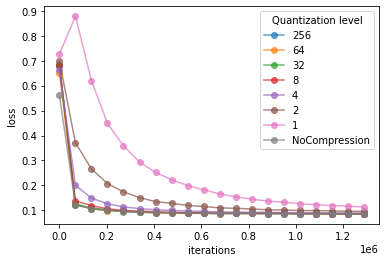

In [71]:
plot_df(loss_quantization_level, xlabel="iterations", ylabel="loss", legend='Quantization level')

plt.savefig(figures_dir + "/loss_versus_iterations_qsgd.jpg")

# Compare with other compression scheme

## Quantization level, random k and top k, all schemes keep 2^8 non-trivial values(non zeros)

In [72]:
loss_qsgd = loss_two_cores
with open(results_dir + '/TopK/epo2_lrtbottou_lr10.0_topk2e8/cores2-0/losses.pickle', 'rb') as f:
    loss_topK = pickle.load(f)
with open(results_dir + '/RandomK/epo2_lrtbottou_lr10.0_randomk2e8/cores2-0/losses.pickle', 'rb') as f:
    loss_randomK = pickle.load(f)
#loss_no_compression
with open(results_dir + '/SignSGD/epo2_lrtbottou_lr10.0_qsgdsNone-0/losses.pickle', 'rb') as f:
    loss_signSGD = pickle.load(f)

In [73]:
loss_all_schemes = pd.DataFrame(columns=["SGD", "RandomK", "TopK",
                                                "NoCompression","SignSGD"])

In [74]:
loss_all_schemes["QSGD (s=256)"] = loss_qsgd
loss_all_schemes["RandomK"] = loss_randomK
loss_all_schemes["TopK"] = loss_topK
loss_all_schemes["NoCompression"] = loss_no_compression
loss_all_schemes["SignSGD"] = loss_signSGD
loss_all_schemes.index = loss_iters

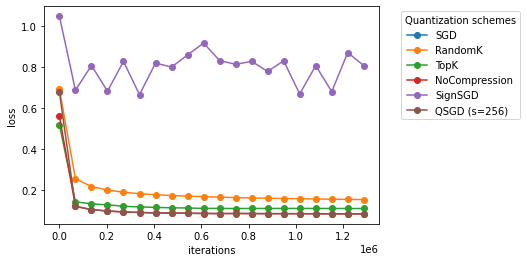

In [75]:
loss_all_schemes.plot(marker='o')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(title='Quantization schemes',bbox_to_anchor=(1.05, 1),loc='upper left')

plt.savefig(figures_dir + "/loss_versus_iterations_all_methods.jpg")

In [76]:
loss_all_schemes

SGD   RandomK      TopK  NoCompression   SignSGD  QSGD (s=256)
0        NaN  0.692797  0.520145       0.561088  1.048048      0.678289
67739    NaN  0.256987  0.144572       0.122178  0.687860      0.123313
135478   NaN  0.219140  0.134663       0.106994  0.808234      0.106379
203217   NaN  0.201788  0.129979       0.099517  0.683621      0.100294
270956   NaN  0.191340  0.122965       0.095313  0.828063      0.095434
338695   NaN  0.183870  0.119716       0.092618  0.666269      0.092722
406434   NaN  0.179116  0.117545       0.090990  0.820151      0.090719
474173   NaN  0.175174  0.115531       0.090023  0.800373      0.089796
541912   NaN  0.172339  0.114567       0.089352  0.859657      0.088543
609651   NaN  0.169789  0.112624       0.087748  0.917492      0.088298
677390   NaN  0.167255  0.112545       0.087355  0.832303      0.087612
745129   NaN  0.165114  0.111983       0.087876  0.814008      0.087597
812868   NaN  0.163317  0.112418       0.087525  0.828376      0.087454
880607   NaN  0.162125  0.112336       0.087108  0.779515      0.086945
948346   NaN  0.160687  0.112455       0.086985  0.831090      0.086895
1016085  NaN  0.159576  0.112454       0.086924  0.669752      0.086746
1083824  NaN  0.158482  0.112380       0.086555  0.807580      0.086373
1151563  NaN  0.157383  0.112316       0.086097  0.681186      0.086246
1219302  NaN  0.156533  0.112109       0.086147  0.871302      0.085839
1287041  NaN  0.155590  0.112157       0.085735  0.807743      0.085837

# Computational time of random k = 2^8 with 4 coures

In [77]:
with open(results_dir + '/RandomK/epo2_lrtbottou_lr10.0_randomk2e8/cores4-0/timers.pickle', 'rb') as f:
    time_randomK = pickle.load(f)

In [78]:
time_randomK

array([8.94260406e-03, 3.18793099e+01, 6.09235373e+01, 8.91661837e+01,
       1.18210074e+02, 1.48353925e+02, 1.76993207e+02, 2.05633785e+02,
       2.35579272e+02, 2.64133697e+02, 2.91972910e+02, 3.17818030e+02,
       3.43853149e+02, 3.69889042e+02, 3.96225625e+02, 4.21960847e+02,
       4.49502298e+02, 4.78344182e+02, 5.05984262e+02, 5.34326650e+02])

In [79]:
with open(results_dir + '/TopK/epo2_lrtbottou_lr10.0_topk2e8/cores4-0/timers.pickle', 'rb') as f:
    top_randomK = pickle.load(f)

In [80]:
top_randomK

array([1.09593868e-02, 1.91396072e+01, 3.84670255e+01, 5.66937077e+01,
       7.57207327e+01, 9.43472922e+01, 1.12072719e+02, 1.29097656e+02,
       1.46422483e+02, 1.64949003e+02, 1.83274382e+02, 2.00499290e+02,
       2.17724307e+02, 2.34849307e+02, 2.52174234e+02, 2.69398474e+02,
       2.87124067e+02, 3.04849495e+02, 3.23075755e+02, 3.41402140e+02])

In [81]:
loss_topK

array([0.5201452 , 0.14457231, 0.134663  , 0.12997903, 0.12296526,
       0.11971602, 0.11754477, 0.11553129, 0.11456701, 0.11262423,
       0.11254492, 0.11198258, 0.11241815, 0.11233597, 0.11245522,
       0.11245373, 0.11237974, 0.11231556, 0.11210855, 0.1121568 ])

In [82]:
time_cores

one_core   two_cores  four_cores
0           0.006233    0.006353    0.007614
67739      67.307158   42.776920   36.465841
135478    137.016087   85.046362   73.425220
203217    204.823111  127.518354  110.483724
270956    271.430292  169.989759  147.542322
338695    338.136311  212.161210  184.701418
406434    404.641789  254.527766  221.760036
474173    470.847262  296.998727  258.819318
541912    537.740810  339.463184  295.678761
609651    604.247138  382.929045  332.937580
677390    670.850689  425.198684  369.896974
745129    738.742093  467.368202  407.057325
812868    805.647758  509.329950  444.116384
880607    872.652079  551.498670  480.983509
948346    939.159076  593.569337  517.842823
1016085  1005.964218  635.739122  554.401114
1083824  1072.668231  678.097574  591.159374
1151563  1140.073566  720.267082  627.717459
1219302  1206.774948  762.536967  664.580758
1287041  1273.462978  804.506913  701.540608

# Number of bytes after compression

In [83]:
X, _ = load_dataset(root_dir, "rcv1.pickle")
_, num_features = X.shape

k=256

load dataset :  data\rcv1.pickle


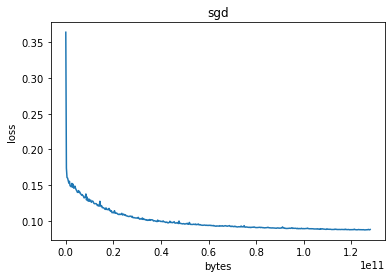

In [84]:
losses_sgd, iters_sgd, timers_sgd = load_results(results_dir + '/sgd_lr_10.0_bottou_freq_500')
bytes_nb_sgd = get_bytes_per_iterations_sgd(iters_sgd, grad_length=num_features)
plot(bytes_nb_sgd, losses_sgd, "bytes", "loss", title='sgd')

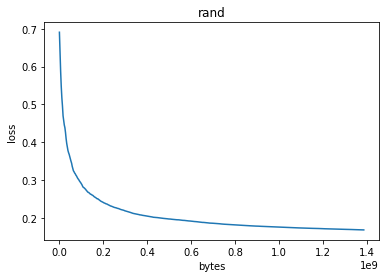

In [85]:
losses_rand, iters_rand, timers_rand = load_results(results_dir + '/rand_256_lr_10.0_bottou_freq_500')
bytes_nb_rand = get_bytes_per_iterations_take_k(iters=iters_rand, k=k)
plot(bytes_nb_rand, losses_rand, "bytes", "loss", title='rand')

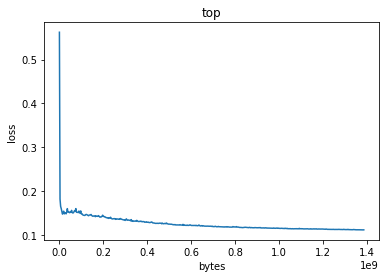

In [86]:
losses_top, iters_top, timers_top = load_results(results_dir + '/top_256_lr_10.0_bottou_freq_500')
bytes_nb_top = get_bytes_per_iterations_take_k(iters=iters_top, k=k)
plot(bytes_nb_top, losses_top, "bytes", "loss", title='top')

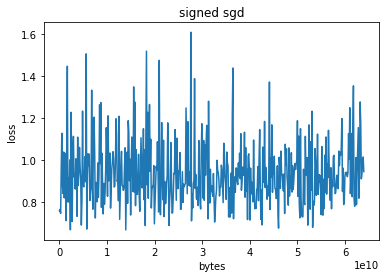

In [87]:
losses_sgn, iters_sgn, timers_sgn = load_results(results_dir + '/signedSGD_lr_10.0_bottou_freq_500')
bytes_nb_sgn = get_bytes_per_iterations_sign_sgd(iters=iters_sgn, grad_length=num_features)
plot(bytes_nb_sgn, losses_sgn, "bytes", "loss", title='signed sgd')

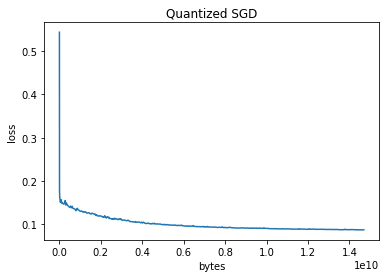

In [88]:
losses_qsgd, iters_qsgd, timers_qsgd = load_results(results_dir + '/qsgd_s_256_lr_10.0_bottou_freq_500')
bytes_nb_qsgd = load_pickles(results_dir + '/qsgd_s_256_lr_10.0_bottou_freq_500/bytes_total.pickle')
plot(bytes_nb_qsgd, losses_qsgd, "bytes", "loss", title='Quantized SGD')

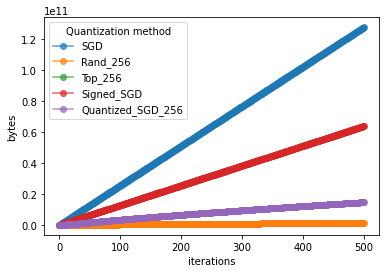

In [89]:
sgd_name = "SGD"
rand_name = "Rand_{}".format(k)
top_name = "Top_{}".format(k)
sgn_name = "Signed_SGD"
qsgd_name = "Quantized_SGD_{}".format(k)

labels=[sgd_name, rand_name, top_name, sgn_name, qsgd_name]

length = len(bytes_nb_qsgd)

df_bytes = pd.DataFrame(columns=labels)

df_bytes[sgd_name] = bytes_nb_sgd[0:length]
df_bytes[rand_name] = bytes_nb_rand[0:length]
df_bytes[sgn_name] = bytes_nb_sgn[0:length]
df_bytes[qsgd_name] = bytes_nb_qsgd[0:length]
plot_df(df_bytes, xlabel="iterations", ylabel="bytes", legend="Quantization method")

Text(0.5, 1.0, 'Loss versus iterations')

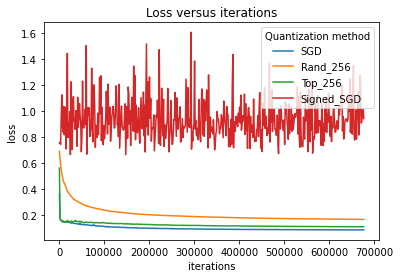

In [90]:
plot(iters_sgd, losses_sgd, "iterations", "loss", title='sgd')
plot(iters_rand, losses_rand, "iterations", "loss", title='rand')
plot(iters_top, losses_top, "iterations", "loss", title='top')
plot(iters_sgn, losses_sgn, "iterations", "loss", title='signed sgd')
plt.legend(title="Quantization method", labels=labels)
plt.title("Loss versus iterations")

In [91]:
plt.title("Loss versus bytes to communicate")
plot(bytes_nb_sgd, losses_sgd, "bytes", "loss", title='sgd')
plot(bytes_nb_rand, losses_rand, "bytes", "loss", title='rand')
plot(bytes_nb_top, losses_top, "bytes", "loss", title='top')
plot(bytes_nb_sgn, losses_sgn, "bytes", "loss", title='signed sgd')
plot(bytes_nb_qsgd, losses_qsgd, "bytes", "loss", title='Quantized sgd')
plt.legend(title="Quantization method", labels=labels)

Loss versus bytes to communicate


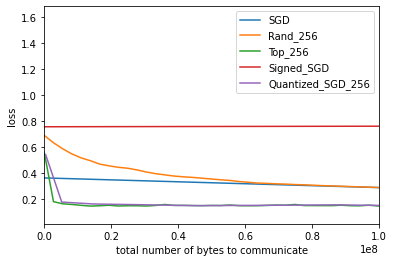

In [96]:
fig, ax = plt.subplots()

ax.plot(bytes_nb_sgd, losses_sgd)
ax.plot(bytes_nb_rand, losses_rand)
ax.plot(bytes_nb_top, losses_top)
ax.plot(bytes_nb_sgn, losses_sgn)
ax.plot(bytes_nb_qsgd, losses_qsgd)

#ax0.set_xscale('log')
ax.set_yscale('linear')
ax.legend(labels)
ax.set_xlim([0,1e8])
ax.set_xlabel("total number of bytes to communicate")
ax.set_ylabel("loss")
print("Loss versus bytes to communicate")

fig.savefig(figures_dir + "/loss_versus_bytes.jpg")